In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from urllib.parse import urlencode 
import datetime
%matplotlib inline 
from urllib.parse import urlencode 
from scipy import stats
from scipy.stats import bootstrap
import matplotlib.pyplot as plt

In [2]:
# Задание 1
# Retention – один из самых важных показателей в компании.
# Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 

In [3]:
problem1_reg_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-krivosheina/shared/problem1-reg_data.csv', sep = ';')
problem1_auth_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-krivosheina/shared/problem1-auth_data.csv', sep = ';')

In [4]:
problem1_reg_data.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [5]:
problem1_reg_data.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [6]:
# Пропущенных значений нет

In [7]:
problem1_reg_data.dtypes

reg_ts    int64
uid       int64
dtype: object

In [8]:
problem1_auth_data.dtypes

auth_ts    int64
uid        int64
dtype: object

In [9]:
# Преобразуем даты в формат дат, оставим их на всякий случай, создадим столбцы с датой без времени

In [10]:
problem1_reg_data['reg_ts']= pd.to_datetime(problem1_reg_data.reg_ts, unit= 's')
problem1_auth_data['auth_ts']= pd.to_datetime(problem1_auth_data.auth_ts, unit= 's')

In [11]:
problem1_reg_data['reg_day']= problem1_reg_data.reg_ts.dt.date
problem1_auth_data['auth_day']= problem1_auth_data.auth_ts.dt.date

In [12]:
# Все UID уникальны

In [13]:
problem1_reg_data.uid.nunique()==problem1_reg_data.uid.count()

True

In [14]:
# Так как у одного пользователя может быть несколько авторизаций,
# необходимо проверить встречается ли пара uid - дата авторизации несколько раз

In [15]:
problem1_auth_data ['uid_auth_day'] = problem1_auth_data['uid'].astype(str) + '_' + problem1_auth_data['auth_day'].astype(str)

In [16]:
problem1_auth_data.uid_auth_day.nunique()==problem1_auth_data.uid_auth_day.count()

True

In [17]:
# пара uid - дата авторизации уникальны, поэтому чистить данные не нужно

In [18]:
# и объединим два ДФ и оставим только столбцы с датами без времени, потому что для подсчета retention время не нужно

In [17]:
data_ex_1 = problem1_auth_data.merge(problem1_reg_data, how = "left", on = 'uid' )

In [18]:
data_ex_1 = data_ex_1[['uid', 'reg_day', 'auth_day']]

In [19]:
# создадим столбец с n днем

In [20]:
data_ex_1['n_day'] = (data_ex_1['auth_day'] - data_ex_1['reg_day']).dt.days

In [21]:
data_ex_1

,uid,reg_day,auth_day,n_day
0,1,1998-11-18,1998-11-18,0
1,2,1999-07-22,1999-07-22,0
2,2,1999-07-22,1999-07-25,3
3,2,1999-07-22,1999-07-31,9
4,2,1999-07-22,1999-08-05,14
...,...,...,...,...
9601008,1110618,2020-09-23,2020-09-23,0
9601009,1110619,2020-09-23,2020-09-23,0
9601010,1110620,2020-09-23,2020-09-23,0
9601011,1110621,2020-09-23,2020-09-23,0


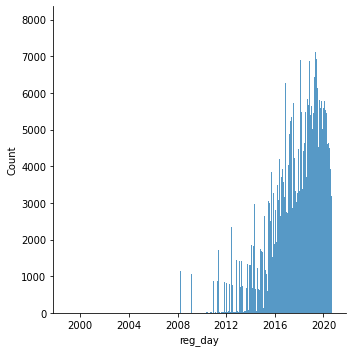

In [22]:
sns.displot(data=data_ex_1.reg_day)

In [23]:
# основная часть пользователей зарегистрировалась после 2016 года

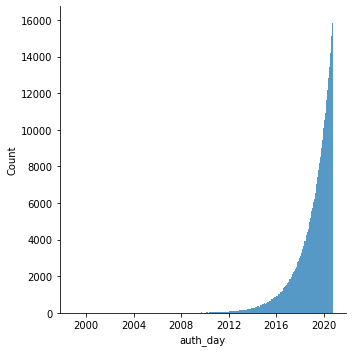

In [24]:
sns.displot(data=data_ex_1.auth_day)

In [27]:
# игра набирает обороты и количество аутентификаци резко выросло после 2018-2019 и продолжает расти, 
# причем рост новых пользователей не такой резкий, что свидетельствует о том, что рост аутентификаций обусловлен не только 
# ростом числа пользователей, но и ростом числа аутентификаций на одного пользователя,
# т.е. пользователи стали чащи посещать игру преимущественно после 2018-2019 годов.

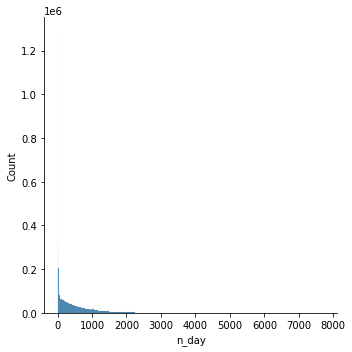

In [25]:
sns.displot(data=data_ex_1.n_day)

In [29]:
# количество пользователей, которые более 5 лет после регистрации пользуются игрой крайне мала
# видимо в игре что-то изменилось,либо началось активное продвижение после 2019,что привлекло большой поток новых пользователей
# пока не понятно как новые пользователи поведут себя в догосрочной перспективе

In [26]:
data_ex_1.reg_day.min()

datetime.date(1998, 11, 18)

In [27]:
def text_1():
    '''
    Чтобы выбрать для каких пользователей мы считаем retention, необходимо указать значение в переменной enter_day_reg
    ВВОДИМ НУЖНУЮ ДАТУ РЕГИСТРАЦИИ, ЧТОБЫ ВЫБРАТЬ ПОЛЬЗОВАТЕЛЕЙ 
    ВЫБОРКА СЧИТАЕТСЯ В ДФ sample_enter_day_reg НИЖЕ И ВЫВОДИТ ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫЕ ЗАРЕГИСТИРОВАЛИСЬ В ДАТУ ИЛИ ПОЗДНЕЕ 
    ДАТЫ, УКАЗАННОЙ В enter_day_reg.

    ЕСЛИ НУЖНО, МОЖНО В РАСЧЕТЕ ПОСТАВИТЬ В РАСЧЕТЕ sample_enter_day_reg В ПОЛЕ НИЖЕ УКАЗАТЬ "<"   ИЛИ  ">" ИЛИ  "==" 
    И ПОЛУЧИТЬ ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫЕ ЗАРЕГИСТИРОВАЛИСЬ ДО ИЛИ ПОСЛЕ ИЛИ В enter_day_reg.

    ДЛЯ ВЫВОДА ПО ВСЕМУ ДФ НЕОБХОДИМО ПОСТАВИТЬ ДАТУ (1998, 11, 17) И ЗНАК ">":

    enter_day_reg = datetime.date(1998, 11, 18)
    sample_enter_day_reg = data_ex_1.loc[lambda problem1_reg_data: problem1_reg_data['reg_day'] > enter_day_reg]
    '''


In [28]:
text_1.__doc__

'\n    Чтобы выбрать для каких пользователей мы считаем retention, необходимо указать значение в переменной enter_day_reg\n    ВВОДИМ НУЖНУЮ ДАТУ РЕГИСТРАЦИИ, ЧТОБЫ ВЫБРАТЬ ПОЛЬЗОВАТЕЛЕЙ \n    ВЫБОРКА СЧИТАЕТСЯ В ДФ sample_enter_day_reg НИЖЕ И ВЫВОДИТ ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫЕ ЗАРЕГИСТИРОВАЛИСЬ В ДАТУ ИЛИ ПОЗДНЕЕ \n    ДАТЫ, УКАЗАННОЙ В enter_day_reg.\n\n    ЕСЛИ НУЖНО, МОЖНО В РАСЧЕТЕ ПОСТАВИТЬ В РАСЧЕТЕ sample_enter_day_reg В ПОЛЕ НИЖЕ УКАЗАТЬ "<"   ИЛИ  ">" ИЛИ  "==" \n    И ПОЛУЧИТЬ ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫЕ ЗАРЕГИСТИРОВАЛИСЬ ДО ИЛИ ПОСЛЕ ИЛИ В enter_day_reg.\n\n    ДЛЯ ВЫВОДА ПО ВСЕМУ ДФ НЕОБХОДИМО ПОСТАВИТЬ ДАТУ (1998, 11, 17) И ЗНАК ">":\n\n    enter_day_reg = datetime.date(1998, 11, 18)\n    sample_enter_day_reg = data_ex_1.loc[lambda problem1_reg_data: problem1_reg_data[\'reg_day\'] > enter_day_reg]\n    '

In [29]:
enter_day_reg = datetime.date(2020, 9, 10) # указываем дату
sample_enter_day_reg = data_ex_1.loc[lambda problem1_reg_data: problem1_reg_data['reg_day'] >= enter_day_reg]

count_of_cohort = sample_enter_day_reg.query('n_day==0') \
                                      .groupby('reg_day', as_index = False) \
                                      .agg({'uid': 'count'})


data_delta_list = list(range(0,101)) # будем считать retention до 100 дня включительно

def calc_retention(sample_enter_day_reg, enter_day_reg):
    retention = {}
    retention_n = {}
    retention_i = []
  

    for reg in count_of_cohort.reg_day:
        sample_reg_day = sample_enter_day_reg.loc[lambda sample_enter_day_reg: sample_enter_day_reg['reg_day'] == reg]
        reg_day_cust = int(count_of_cohort.loc[lambda count_of_cohort: count_of_cohort['reg_day'] == reg ].uid)

        for day in data_delta_list:
           
            auth_day_cust = sample_reg_day.loc[lambda sample_reg_day: sample_reg_day['n_day'] == day].uid.nunique()
            
            if reg_day_cust != 0:
                retention_n_i = round (auth_day_cust/reg_day_cust * 100, 2)
             
            else:
                retention_n_i = 0
                
            retention_i.append (retention_n_i )
        
        retention_n ={reg:retention_i}
        retention.update(retention_n) 
        retention_i = [] 
        
    return retention

In [30]:
calc_retention_func = calc_retention(sample_enter_day_reg, enter_day_reg)

In [31]:
retention_df = pd.DataFrame(calc_retention_func).transpose()

In [32]:
retention_df = retention_df.reset_index(drop=False)

In [33]:
columns_name = data_delta_list.copy()
columns_name.insert(0, 'reg_data')

In [34]:
retention_df.columns =[columns_name]

In [35]:
retention_df

,reg_data,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,2020-09-10,100.0,2.05,4.29,4.79,4.23,6.77,6.28,7.09,4.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-09-11,100.0,1.30,4.03,4.53,5.65,5.71,6.70,6.33,4.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-09-12,100.0,1.92,3.84,4.71,4.65,6.07,6.57,5.76,5.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-09-13,100.0,1.98,4.08,4.26,5.13,6.55,6.49,4.94,4.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-09-14,100.0,2.22,3.83,4.51,5.31,6.49,6.98,6.30,4.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-09-15,100.0,2.22,4.07,4.56,6.04,5.61,6.90,5.67,2.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-09-16,100.0,1.91,4.25,4.62,4.68,6.77,6.95,3.38,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-09-17,100.0,1.66,4.30,4.55,5.47,6.27,4.24,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2020-09-18,100.0,1.90,4.54,4.23,5.21,3.74,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2020-09-19,100.0,1.84,3.55,4.71,3.49,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Задание 2
# Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений.
# Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной.
# При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

# Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [36]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/SOkIsD5A8xlI7Q' 
 
# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл в df 
download_response = requests.get(download_url) 
data_ex_2 = pd.read_csv(download_url, sep = ';') 

In [37]:
data_ex_2.user_id.nunique()==data_ex_2.user_id.count()

True

In [38]:
# каждый пользователь встречается в статистике 1 раз

In [39]:
data_ex_2

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b
...,...,...,...
404765,404766,0,a
404766,404767,0,b
404767,404768,231,a
404768,404769,0,a


In [40]:
data_ex_2_a = data_ex_2.query('testgroup=="a"') # группа а (контрольная)
data_ex_2_b = data_ex_2.query('testgroup=="b"') # группа в (тестовая)

In [41]:
data_ex_2_sum_renev = data_ex_2.groupby('testgroup', as_index = False) \
                               .agg({'revenue':'count'}) 
data_ex_2_sum_renev

,testgroup,revenue
0,a,202103
1,b,202667


In [42]:
# Размер тестовой b и контрольной группы a практически равны (тестровая больше на 0,3%)

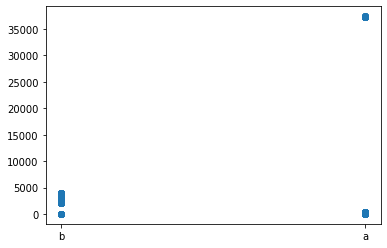

In [43]:
plt.scatter(data_ex_2.testgroup,data_ex_2.revenue)

In [44]:
# в выборке a есть выбросы со значением revenue более 35 000

In [47]:
data_ex_2_without_ejection = data_ex_2.query('revenue < 35000')

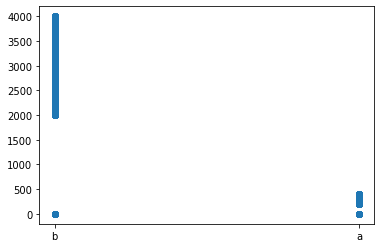

In [48]:
plt.scatter(data_ex_2_without_ejection.testgroup,data_ex_2_without_ejection.revenue)

In [49]:
# В выборке a есть выбросы более 35000, но если не брать и в расчет, основаная часть наблюдений, отличных от нуля,
# в выборке a лежит в диапазоне до 500, а в выборке b - от 2000 до 4000

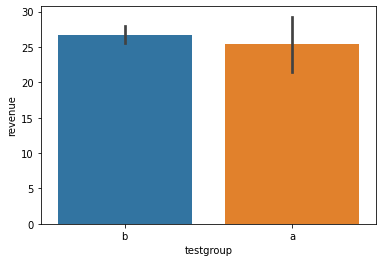

In [50]:
sns.barplot(data = data_ex_2, x='testgroup', y='revenue', hue=None)

In [54]:
# В выборках ARPU клиентов примерно одинаково, но стандартная ошибка среднего в выборке a  больше из-за выборосов

In [51]:
data_ex_2_avg_sum_renev = data_ex_2.groupby('testgroup', as_index = False) \
                                   .agg({'revenue':'mean'}) \
                                   .round(2)
data_ex_2_avg_sum_renev

,testgroup,revenue
0,a,25.41
1,b,26.75


In [52]:
# ARPU группы b больше на 5% 
# Сравним средние значения revenue на статзначимые различия

In [64]:
stats.levene(data_ex_2_a.revenue, data_ex_2_b.revenue, center='mean')

LeveneResult(statistic=1.57736044973474, pvalue=0.2091420343022563)

In [65]:
# p-значение составляет более 0,05 - это ознаяает, что требование гомогенности дисперсий выполняется,
# поэтому t- тест использовать можно при выполнении требования нормальности распределения выборок

In [66]:
from scipy import stats
stats.shapiro(data_ex_2_a.revenue)

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.008876502513885498, pvalue=0.0)

In [67]:
from scipy import stats
stats.shapiro(data_ex_2_b.revenue)

ShapiroResult(statistic=0.06588172912597656, pvalue=0.0)

In [68]:
# pvalue меньше 0,05, поэтому выборки не могут считаться нормальными
# но на таких больших объемах данных для использования t- теста проверкой нормальности можно пренебречь, но при этом 
# в данных не должно быть заметных выбросов. Это не наш вариант, поэтому используем bootstrap.

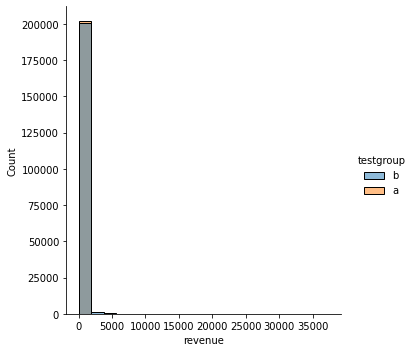

In [69]:
sns.displot(data=data_ex_2, x="revenue", hue="testgroup", bins = 20)

In [112]:
a_df_1 = data_ex_2.query('testgroup == "a"')
b_df_1 = data_ex_2.query('testgroup == "b"')

mean_diff = []

for i in range(10000):
    sample_a = a_df_1.sample(frac=1, replace=True)
    sample_mean_a = sample_a.revenue.mean()
    
    
    sample_b = b_df_1.sample(frac=1, replace=True)
    sample_mean_b = sample_b.revenue.mean()
    
    
    sample_mean_diff = sample_mean_a - sample_mean_b
    mean_diff.append(sample_mean_diff)

In [113]:
pd.Series(mean_diff).quantile(0.025)

-5.482449446051898

In [114]:
pd.Series(mean_diff).quantile(0.975)

3.0100113778324498

In [66]:
# доверительный интервал дельты выборочных средних пересекает 0, это означает, что средние выборок статзначимо не отличаются

In [71]:
data_ex_2_med_renev = data_ex_2.groupby('testgroup', as_index = False) \
                                   .agg({'revenue':np.median}) 
data_ex_2_med_renev

,testgroup,revenue
0,a,0
1,b,0


In [72]:
# медианы в выборках равны 0, потому что CR значительно ниже 50%  и у бОльшей части пользователей revenue 0

In [73]:
data_ex_2_not_0_ren_count = data_ex_2.query('revenue > 0') \
                                     .groupby('testgroup', as_index = False) \
                                     .agg({'revenue':'count'})

data_ex_2_not_0_ren_count # количество платящих пользователей

,testgroup,revenue
0,a,1928
1,b,1805


In [74]:
data_ex_2_sum_cust = data_ex_2.groupby('testgroup', as_index = False) \
                              .agg({'revenue':'count'})

data_ex_2_sum_cust # количество всех пользователей

,testgroup,revenue
0,a,202103
1,b,202667


In [75]:
data_ex_2_cr = data_ex_2_not_0_ren_count.merge(data_ex_2_sum_cust, on = 'testgroup' )
data_ex_2_cr = data_ex_2_cr.rename(columns = {'revenue_x':'val_not_0', 'revenue_y':'all_val'})
data_ex_2_cr['cr'] = round(data_ex_2_cr['val_not_0']/data_ex_2_cr['all_val']*100,2)
data_ex_2_cr # доля платящих пользователей

,testgroup,val_not_0,all_val,cr
0,a,1928,202103,0.95
1,b,1805,202667,0.89


In [76]:
data_ex_2_cr [['val_not_0', 'all_val']] .transpose()

,0,1
val_not_0,1928,1805
all_val,202103,202667


In [77]:
from scipy.stats import chi2_contingency
obs = data_ex_2_cr [['val_not_0', 'all_val']] .transpose()
chi2_contingency(obs)

(4.294148751290092,
 0.03824373651044171,
 1,
 array([[  1864.48501725,   1868.51498275],
        [202166.51498275, 202603.48501725]]))

In [78]:
# pvalue(0.03824373651044171) ниже, чем 0,05, поэтому мы можем говорить о том, что то cr в группах a и b статзначимо отличается.
# В контрольной группе бОльшая доля пользователей воспользовалась акционным предложением (на 0,06 %)

In [79]:
data_ex_2_sum_ren = data_ex_2.groupby('testgroup', as_index = False) \
                             .agg({'revenue':'sum'})
data_ex_2_sum_ren

,testgroup,revenue
0,a,5136189
1,b,5421603


In [80]:
 # Суммарная прибыль от пользователей тестовой группы b больше на 5 % несмотря на то, что в группе а cr больше на 0,06 %.
 # Это следствие того, что выборка b больше на 0,3 % пользоватлей и ARPU группы b больше на 5% 

In [81]:
 # Посмотрим отдельно на платящих пользователей

In [82]:
data_ex_2_not_0_ren_mean = data_ex_2.query('revenue > 0') \
                                    .groupby('testgroup', as_index = False) \
                                    .agg({'revenue':'mean'}) \
                                     .round(0)
data_ex_2_not_0_ren_mean

,testgroup,revenue
0,a,2664.0
1,b,3004.0


In [83]:
# ARPPU в тестовой группе (b) выше на 11 %, чем в контрольной (a)

In [84]:
data_ex_2_not_0_ren_median = data_ex_2.query('revenue > 0') \
                                      .groupby('testgroup', as_index = False) \
                                      .agg({'revenue':np.median}) \
                                      .round(0)
data_ex_2_not_0_ren_median

,testgroup,revenue
0,a,311
1,b,3022


In [85]:
# медианные траты по платящим пользователям в тестовой группе (b) почти в 10 раз выше, чем в контрольной

In [86]:
sample_a = data_ex_2.query('testgroup == "a" & revenue > 0').revenue # контрольная групп, платящие пользователи

In [87]:
sample_b = data_ex_2.query('testgroup == "b" & revenue > 0').revenue # тестовая группа, платящие пользователи

In [88]:
# чтобы использовать t-тест, необходимо проверить выборки на гомогенность дисперсий и нормальность

In [89]:
stats.levene(sample_a, sample_b, center='mean')

LeveneResult(statistic=445.9869447066088, pvalue=1.3202514573715939e-93)

In [90]:
stats.levene(sample_a, sample_b, center='median')

LeveneResult(statistic=80.85567421779912, pvalue=3.779689868667878e-19)

In [91]:
# p-значение составляет менее 0,05 и по средгнему значению и по медиане
# Это ознаяает, что требование гомогенности дисперсий не выполняется, поэтому t- тест использовать не получится
# будем использовать bootstrap

In [92]:
# Посмотрим как выглядят выборки платящих пользователей на графике

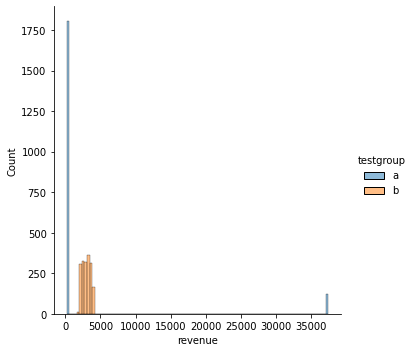

In [93]:
sns.displot(data=data_ex_2.query('revenue > 0'), x="revenue", hue="testgroup")

In [94]:
# контрольная выборка (a) крайне неоднородна

In [95]:
data_ex_2.query('testgroup == "a" & revenue > 37000').revenue.count() 
# в контрольной выборке 6 % (123 из 1928) составляют траты суммой более 37 000

123

In [96]:
data_ex_2.query('testgroup == "a" & revenue > 37000').revenue.sum() 
# и при этом составляют 89 % от всех потраченных средств от пользователей контрольной группы (4 590 252 из 5 136 189)

4590252

In [97]:
data_ex_2.query('testgroup == "a" & revenue < 450 & revenue > 0').revenue.count() 
# основная же часть контрольной выборки (94%) значений лежит в интервале от 200 до 450

1805

In [98]:
data_ex_2.query('testgroup == "a" & revenue < 450 & revenue > 0').revenue.sum() 
# и при этом составляют 11 % от всех потраченных средств от пользователей контрольной группы (545 937 из 5 136 189)

545937

In [99]:
# чтобы оценить статистическую значимость различий в медианах и средних применяем bootstrap

In [100]:
a_df = data_ex_2.query('testgroup == "a" & revenue > 0')
b_df = data_ex_2.query('testgroup == "b" & revenue > 0')

median_diff = []

for i in range(10000):
    sample_data_a = a_df.sample(frac=1, replace=True)
    sample_median_a = sample_data_a.revenue.median()
    
    
    sample_data_b = b_df.sample(frac=1, replace=True)
    sample_median_b = sample_data_b.revenue.median()
    
    
    sample_median_diff = sample_median_a - sample_median_b
    median_diff.append(sample_median_diff)

In [101]:
pd.Series(median_diff).quantile(0.025)

-2760.0

In [102]:
pd.Series(median_diff).quantile(0.975)

-2657.0

In [103]:
# медианы стазначимо отличаются, т.е. экспиримент повлиял на медианные траты платящих пользователей

In [104]:
a_df_w0 = data_ex_2.query('testgroup == "a" & revenue > 0')
b_df_w0 = data_ex_2.query('testgroup == "b" & revenue > 0')

mean_diff_w0 = []

for i in range(10000):
    sample_a_w0 = a_df_w0.sample(frac=1, replace=True)
    sample_mean_a_w0 = sample_a_w0.revenue.mean()
    
    
    sample_b_w0 = b_df_w0.sample(frac=1, replace=True)
    sample_mean_b_w0 = sample_b_w0.revenue.mean()
    
    
    sample_mean_diff_w0 = sample_mean_a_w0 - sample_mean_b_w0
    mean_diff_w0.append(sample_mean_diff_w0)

In [105]:
pd.Series(mean_diff_w0).quantile(0.025)

-736.9073267333135

In [106]:
pd.Series(mean_diff_w0).quantile(0.975)

70.56851602280355

In [107]:
# средние стазначимо не отличаются, т.е. экспиримент не повлиял на средние траты платящих пользователей

In [108]:
def text_2():
    '''
     Какие выводы можно сделать?
     
     При сравнении средних доходов от пользователей статзначимых различий в экспериментах не обнаружено.
     CR в группе a статзначимо отличается от группы b  и выше на 0,06 %. При численности выборки 10 000 - это дополнительно
     всего 6 платящих пользователей, а при численноси 100 000 - 60. 
     Если же смотреть по медианным тратам платящих пользователей, то в группе b результаты статзначимо выше группы a.
          
     Поэтому, если рассматиривать метрики в совокупности, то я бы бы рекомендовала выбрать вариант b, ведь с точки зрения
     надежности для бизнеса он предпочтительнее, так как все пользователи платят плюс/минус одинаково и потеря одного
     (особенно крупного) пользователяне не приведет к существенному проседанию общей прибыли, как в варианте a. 
     
     А чтобы доходы были максимальны, необходимо применить гибридный варинт акционных предложений:
     проанализировать срез клиентов и выявить потенциальных пользователей, которые могут потратить более 37 000
     и применить к ним набор предложения из контрольной группы, а остальным пользователям предлагать
     варианты из тестовой, где средние и медианные траты основной массы пользователей выше.
     Таким образом мы получим и сверхвысокодоходных пользователей, которых будет немного, но которые значимо влияют на 
     общую прибыль, и увеличим прибыль от основной массы базовых пользователей.

     '''

In [109]:
text_2.__doc__

'\n     Какие выводы можно сделать?\n     \n     При сравнении средних доходов от пользователей статзначимых различий в экспериментах не обнаружено.\n     CR в группе a статзначимо отличается от группы b  и выше на 0,06 %. При численности выборки 10 000 - это дополнительно\n     всего 6 платящих пользователей, а при численноси 100 000 - 60. \n     Если же смотреть по медианным тратам платящих пользователей, то в группе b результаты статзначимо выше группы a.\n          \n     Поэтому, если рассматиривать метрики в совокупности, то я бы бы рекомендовала выбрать вариант b, ведь с точки зрения\n     надежности для бизнеса он предпочтительнее, так как все пользователи платят плюс/минус одинаково и потеря одного\n     (особенно крупного) пользователяне не приведет к существенному проседанию общей прибыли, как в варианте a. \n     \n     А чтобы доходы были максимальны, необходимо применить гибридный варинт акционных предложений:\n     проанализировать срез клиентов и выявить потенциальных п

In [110]:
# Задание 3
# В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить 
# уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. 
# Для получения награды требуется пройти ряд уровней за определенное время. 
# С помощью каких метрик можно оценить результаты последнего прошедшего события?

# Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок
# будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

In [111]:
def text_3():
    '''Во время тематического события я бы сняла следующие метрики:
    
1.Время прохождения доп уровней (делим на п4 и получаем среднее время одной попытки,  делим на п2 и получаем сколько времени
  в среднем один игрок пытался получить бонус)
2.Количество игроков, которые попытались получить бонус (делим на п3  и получаем долю от активных игроков)
3.Количество активных игроков(например, такой расчет 0- игроки, которые загружали игру и провели в ней минимум 10 минут 
  за последний месяц)
4.Количество попыток прохождения доп уровней
5.Количество игроков, получивших бонус (делим на п3  и получаем долю от активных игроков)
6.Количество удачных и неудачных попыток(делим на п3  и получаем долю от активных игроков)
7.Уровень до события (можем посмотреть какого рода игроки принимают участие в событии)
8.НОВАЯ МЕТРИКА - Уровень после события (считаем дельту между уровнями до и после тематического события. До эксперимента,
  вероятно, уровни были либо неизменны либо естественно росли в ходе прохождения игры, после же эксперимента возможны откаты, 
  которые нужно зафиксировать)

Так как количество пользователей от месяца к месяцу может меняться, рассматривать чистые цифры по количеству пользователей не 
следует. Необходимо рассчитывать % от активной пользовательской базы в текущем месяце. Средние же данные по времени 
прохождения уровня, времени проведенного в игре и др, а также средний уровень игроков и  дельту в уровнях игроков сравнивать 
вполне уместно.

Так как раньше пользователи просто не получали доп вещь при неудаче, а теперь лишаются части пройденных уровней, то я бы 
выделила группу пользователей, которая принимала участие в попытке выиграть бонус по новым правилам, и посмотрела на ее
показатели за месяц (лучше 2-3 месяца) до события и месяц сразу после. 
Также можно сравнить показатели по группам, которые принимали участие в прошлых событиях и рассмотреть месяц после него 
и группу, которая играла по новым условия и месяц после него.

Показатели:
    
1.Average Session Duration — это среднее время сессий за период времени

2.Average Transaction Value — средняя стоимость покупок за период, средний чек
  (ATV = Общая сумма покупок / количество покупок)

3. Stickiness rate - регулярность использования приложения в течение месяца. 
   Stickiness rate = DAU / MAU 
   (DAU/WAU/MAU - количество уникальных пользователей в день/в  неделю/ в месяц). 
   Просто DAU/WAU/MAU смотреть не имеет большого смысла, тк группы по объему могут отличаться.
 
4. Retention rate - процент клиентов, которые возвращаются в приложение.
   Day N Retention измеряет, сколько пользователей возвращается на N-й день после события.

5. Churn rate - отток пользователей.
   Retention Rate наоборот: 100% − Retention = Churn Rate.

6. ARPU/ARPPU средний доход с одного пользователя/платящего пользователя.
   ARPU = Выручка с когорты за всё время / количество пользователей в когорте.
   ARPPU = Выручка приложения / количество уникальных платящих пользователей.

7. Виральность - характеризует степень распространения игры, а также готовность и желание пользователей привлекать своих 
   знакомых и друзей для совместных развлечений.

Часть показателей могла ухудшиться, потому как пользователи могли разочароваться или обидеться за полученный регресс.
Либо наоборот, пользователи стали активнее играть и покупать, чтобы нивелировать откат. 
Также при сравнении с другими месяцами и группами следует учесть сезонность (применит коэффициент, например, чтобы стандартные
сезонные изменения не влияли на результат сравнения), ведь показатели не однородны в течение года и меняются 
по ественственным причинам  при прочих равных условиях.
'''


In [10]:
text_3.__doc__

'Во время тематического события я бы сняла следующие метрики:\n    \n1.Время прохождения доп уровней (делим на п4 и получаем среднее время одной попытки,  делим на п2 и получаем сколько времени\n  в среднем один игрок пытался получить бонус)\n2.Количество игроков, которые попытались получить бонус (делим на п3  и получаем долю от активных игроков)\n3.Количество активных игроков(например, такой расчет 0- игроки, которые загружали игру и провели в ней минимум 10 минут \n  за последний месяц)\n4.Количество попыток прохождения доп уровней\n5.Количество игроков, получивших бонус (делим на п3  и получаем долю от активных игроков)\n6.Количество удачных и неудачных попыток(делим на п3  и получаем долю от активных игроков)\n7.Уровень до события (можем посмотреть какого рода игроки принимают участие в событии)\n8.НОВАЯ МЕТРИКА - Уровень после события (считаем дельту между уровнями до и после тематического события. До эксперимента,\n  вероятно, уровни были либо неизменны либо естественно росли в 